In [ ]:
#This program uses AI base neutal network call LSTM long short term meomry
# to predict closing stock markert

In [2]:
!pip install pandas numpy scikit-learn matplotlib yfinance

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-01')

AttributeError: 'NoneType' object has no attribute 'group'

In [5]:
ticker = 'AAPL'  # Example: Apple Inc.
stock_data = yf.download(ticker, start='2012-01-01', end='2020-01-01')

NameError: name 'yf' is not defined

In [6]:
pip install yfinance


In [7]:
import yfinance as yf  # Ensure yfinance is imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [8]:
ticker = 'AAPL'  # Example: Apple Inc.
stock_data = yf.download(ticker, start='2012-01-01', end='2020-01-01')


[*********************100%***********************]  1 of 1 completed


In [10]:
tock_data['Date'] = stock_data.index
stock_data = stock_data[['Date', 'Close']]
stock_data['Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)


NameError: name 'tock_data' is not defined

In [11]:
stock_data['Date'] = stock_data.index  # Correct the typo here (stock_data, not tock_data)
stock_data = stock_data[['Date', 'Close']]
stock_data['Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)


<ipython-input-11-0c312ca4e386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)


In [12]:
stock_data = stock_data[['Close']].copy()  # Select 'Close' and use .copy() to avoid the warning
stock_data['Date'] = stock_data.index  # Add the 'Date' column
stock_data.loc[:, 'Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)  # Use .loc[] to avoid SettingWithCopyWarning



In [13]:
X = np.array(stock_data['Date']).reshape(-1, 1)
y = np.array(stock_data['Close']).reshape(-1, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)


In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 27.037385232121217


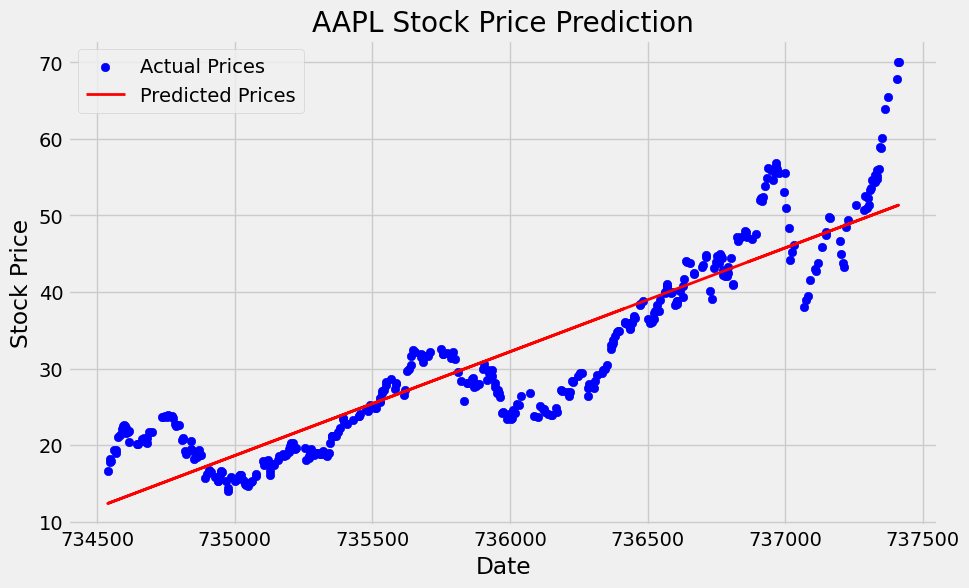

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error


In [20]:
ticker = 'AAPL'  # Stock ticker symbol for Apple Inc.
data = yf.download(ticker, start='2012-01-01', end='2023-01-01')


[*********************100%***********************]  1 of 1 completed


In [21]:
data = data[['Close']]  # Extract only the 'Close' price column
data = data.dropna()  # Remove any rows with missing data


In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale data between 0 and 1
scaled_data = scaler.fit_transform(data)


In [23]:
training_data_len = int(np.ceil(len(scaled_data) * 0.8))  # Use 80% of the data for training

train_data = scaled_data[0:int(training_data_len), :]  # Training data
test_data = scaled_data[int(training_data_len):, :]  # Testing data


In [24]:
def create_dataset(data, time_step=60):
    X = []
    y = []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Previous 'time_step' days as input
        y.append(data[i, 0])  # Target value (next day)
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)


In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [26]:
model = Sequential()

# Add LSTM layers and Dropout layers to prevent overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.fit(X_train, y_train, batch_size=64, epochs=20)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 0.0067
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.5961e-04
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 4.3291e-04
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 3.6438e-04
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.6901e-04
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 3.3307e-04
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 3.1478e-04
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 2.9837e-04
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.8850e-04
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 2.7755e-04
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 2.7139e-04
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 2.6120e-04
Epoch 13/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.6436e-04
Epoch 14/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 3.0636e-04
Epoch 15/20
34/34 

In [31]:
# Inverse transform the predictions and actual values to get them back to original scale
predictions = scaler.inverse_transform(predictions)

# Reshape y_test to 2D before inverse transform
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 654019.3554641381


In [33]:
# Inverse transform the predictions and actual values to get them back to original scale
predictions = scaler.inverse_transform(predictions)

# Flatten y_test if necessary to ensure it's the same shape as predictions
y_test = y_test.flatten()
predictions = predictions.flatten()

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 17386381225884.936


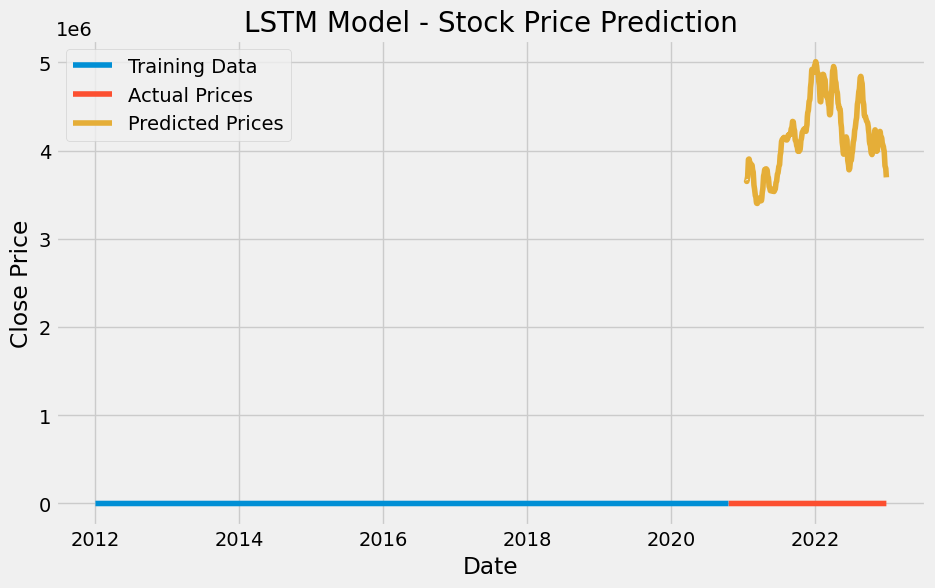

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time_step variable (example value)
time_step = 60  # For example, if you used 60 time steps in your model

# Ensure valid length is consistent with predictions length
predictions_length = len(predictions)
expected_length = len(valid) - time_step

if predictions_length != expected_length:
    raise ValueError(f"Length of predictions ({predictions_length}) does not match expected length ({expected_length})")

# Initialize the Predictions column with NaN
valid = valid.copy()  # Avoid SettingWithCopyWarning
valid['Predictions'] = np.nan

# Use .iloc for positional indexing
valid.iloc[time_step:, valid.columns.get_loc('Predictions')] = predictions.flatten()

# Plot the results
plt.figure(figsize=(10, 6))
plt.title('LSTM Model - Stock Price Prediction', fontsize=20)
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(valid.index, valid['Close'], label='Actual Prices')
plt.plot(valid.index, valid['Predictions'], label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
